In [16]:
 # Open and read the Names.txt file
with open('/kaggle/input/indian-names-boys-girls/Names.txt', 'r', encoding='utf-8') as f:
    names = f.readlines()

# Strip whitespace/newlines
names = [name.strip() for name in names]

# Show first few names
print((names[5]))


Aabheer


In [17]:
names = [n.lower() for n in names]

cleaned_names = []
for n in names:
    vn = ''
    for ch in n:
        if ch in [' ', '-', '.']:
            break
        vn += ch
    cleaned_names.append(vn)

words = cleaned_names
names = cleaned_names

In [18]:
b = {}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [19]:
import torch
N =  torch.zeros((27, 27), dtype = torch.int32)

In [20]:
chars = sorted(list(set(''.join(names))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [21]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [22]:
# adjacency list
for w in names:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [23]:
N

tensor([[    0,  6774,  1841,  1081,  3138,   708,   142,  1532,  1705,   918,
          2562,  4321,  1377,  3959,  3607,   213,  3356,    16,  3443,  5320,
          2941,   660,  4191,    97,     1,  1661,   127],
        [16877,  4599,  1496,   310,  2204,   504,    56,  1590,  1721,  2154,
          2153,  2988,  3988,  3978, 26124,    21,   809,     6, 10980,  5494,
          5286,   261,  3704,   160,    67,  2788,   236],
        [   86,  1820,    35,     0,    39,   300,     0,     1,  1357,   941,
             8,     0,    12,     0,     6,   121,     2,     0,   262,     7,
             6,   214,     0,     1,     0,    42,     1],
        [   18,   206,     0,    15,     0,    26,     0,     0,  1781,    59,
             0,   118,     6,     0,     1,    23,     0,     0,     4,     4,
             3,     7,     0,     0,     0,    25,     0],
        [  398,  1905,     8,    30,   123,  1411,     0,    10,  3121,  1113,
             3,     6,    10,    91,    31,    63,   

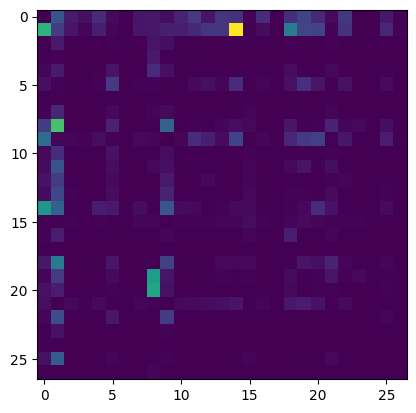

In [24]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.imshow(N)

(-0.5, 26.5, 26.5, -0.5)

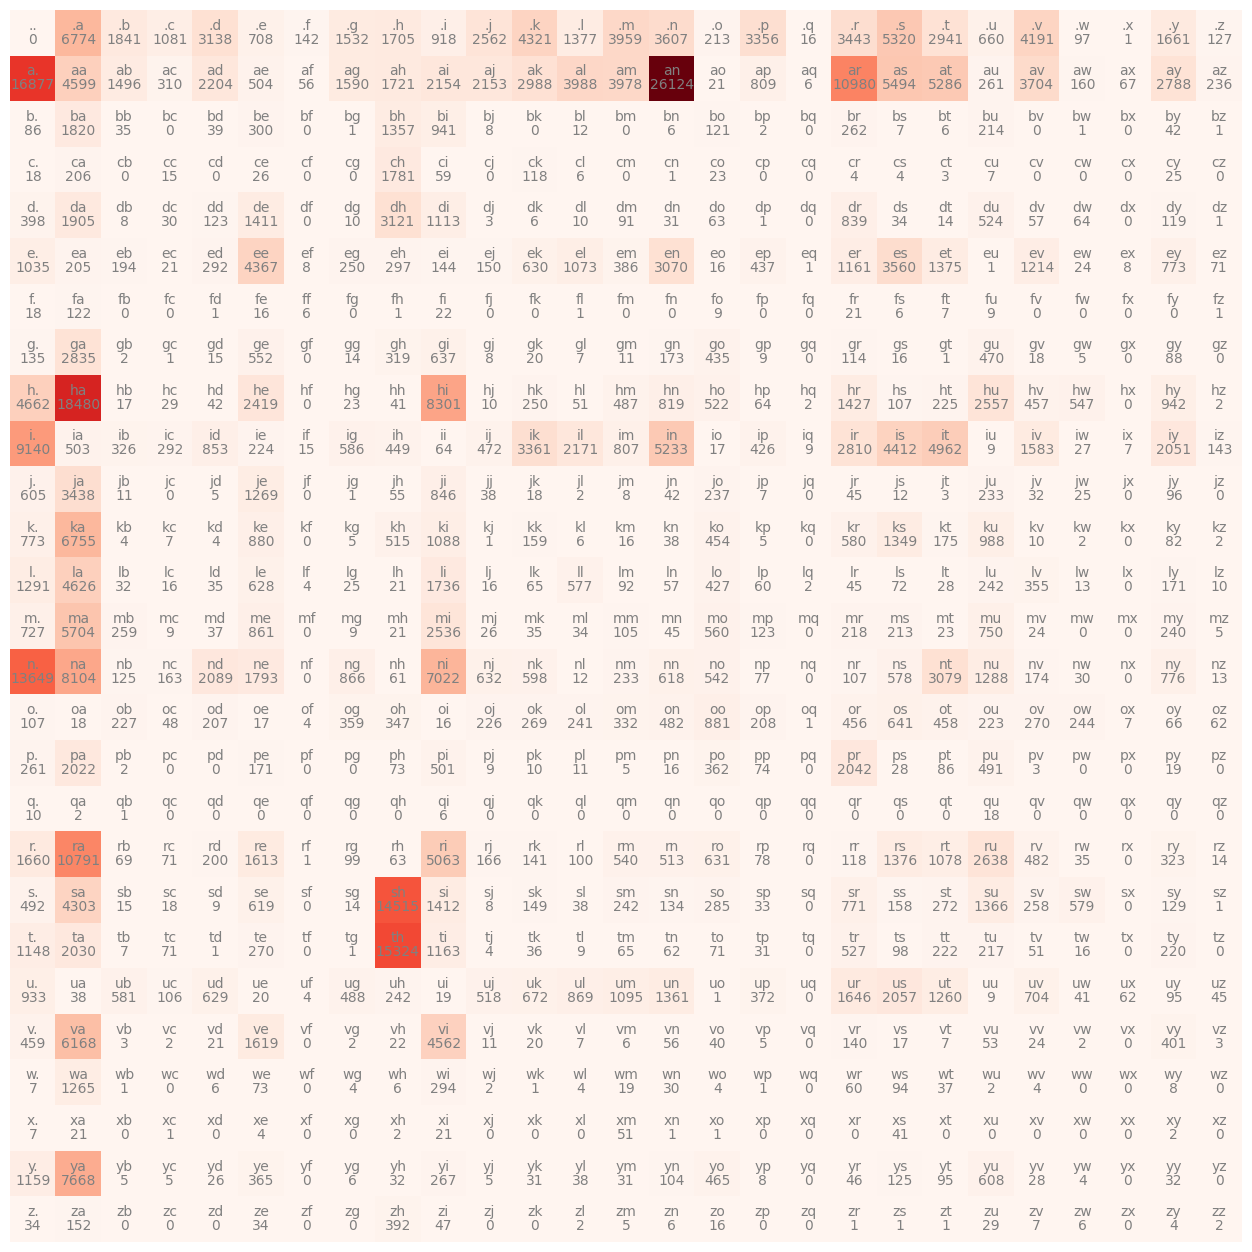

In [25]:
plt.figure(figsize = (16,16))
plt.imshow(N, cmap = 'Reds')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va= "bottom", color = "gray")
        plt.text(j, i, N[i, j].item(), ha="center", va = 'top', color = "gray")

plt.axis('off')

In [26]:
N[1]

tensor([16877,  4599,  1496,   310,  2204,   504,    56,  1590,  1721,  2154,
         2153,  2988,  3988,  3978, 26124,    21,   809,     6, 10980,  5494,
         5286,   261,  3704,   160,    67,  2788,   236], dtype=torch.int32)

In [64]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000e+00, 1.2164e-01, 3.3057e-02, 1.9411e-02, 5.6347e-02, 1.2713e-02,
        2.5498e-03, 2.7509e-02, 3.0615e-02, 1.6484e-02, 4.6004e-02, 7.7589e-02,
        2.4726e-02, 7.1089e-02, 6.4768e-02, 3.8247e-03, 6.0261e-02, 2.8730e-04,
        6.1823e-02, 9.5527e-02, 5.2809e-02, 1.1851e-02, 7.5255e-02, 1.7418e-03,
        1.7956e-05, 2.9825e-02, 2.2804e-03])

In [65]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g)
[itos[i.item()] for i in ix]


['j']

In [66]:
g = torch.Generator().manual_seed(2147483647)
# ix = torch.multinomial(p, num_samples = 20, replacement = True, generator=g)
p = torch.rand(3, generator= g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [67]:
g = torch.Generator().manual_seed(2147483647)
torch.multinomial(p, num_samples = 1, replacement = True, generator=g).item()


0

In [68]:
p.shape

torch.Size([3])

In [69]:
P = (N+1).float()
P.shape
P_sr = P.sum(1, keepdim = True)

In [70]:
P /= P_sr

In [71]:
g = torch.Generator().manual_seed(2147483647)

for i in range (10):
    
    out = []
    ix = 0
    while True:

        p = P[ix]
        # p = N[ix].float()
        # p = p / p.sum()
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix == 0 :
            break
        
    print(''.join(out))

junidha.
anasar.
prusayanina.
vai.
rithashasathan.
sannia.
vanileviajededainrwi.
thashiyanay.
arthamavaumarin.
dhumerugnishinaruthi.


In [73]:
# Here ends the probibilist model what is done till here is based on the input data i created a bigram model.
# created a hash table of frequency of occurence of two words and based o the probability woth a generator g sampling the first character
# and based on those probabilities sampling the next characted 

# LETS REDUCE THE LOG LIKELIHOOD

In [80]:
log_likelihood = 0.0
n=0

for w in ["duke"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')


print(f'{log_likelihood=}')
nll = - log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

.d: 0.0563 -2.8764
du: 0.0525 -2.9472
uk: 0.0484 -3.0275
ke: 0.0633 -2.7604
e.: 0.0498 -2.9991
log_likelihood=tensor(-14.6106)
nll=tensor(14.6106)
2.922119140625


In [85]:
# create the training set of bigrams 

xs, ys = [], []

for w in names[2:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. a
a a
a b
b h
h a
a s
s .


In [86]:
print(xs)
print(ys)

tensor([ 0,  1,  1,  2,  8,  1, 19])
tensor([ 1,  1,  2,  8,  1, 19,  0])


In [87]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes = 27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0., 0.]])

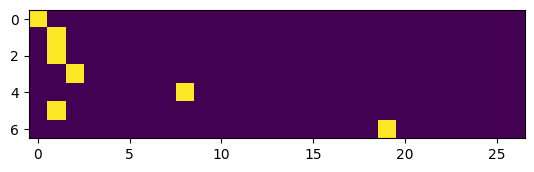

In [88]:
plt.imshow(xenc)

In [89]:
xenc.shape

torch.Size([7, 27])

In [90]:
g = torch.Generator().manual_seed(2147483647+2)
W = torch.randn((27,27), generator = g)
W

# xenc = 5 x 27 and W = 27 x 27 => xenc @ W = 5 x 27
xenc@W

tensor([[-0.6839,  0.0283,  0.7678, -0.4540, -0.9346,  0.6324,  0.4164, -1.0378,
          0.5803, -2.5756, -0.5588,  0.9751, -0.2127, -0.3324,  0.6210,  1.8616,
         -0.1375,  0.0440,  1.1647,  2.2742, -0.5821, -3.3109, -1.3245,  1.6253,
         -1.7739, -0.4036, -0.6012],
        [ 0.7208, -0.3736,  0.3780, -1.2722, -0.1348,  0.6941,  1.1592, -0.2293,
         -0.4106, -0.9307, -0.4981,  0.6015,  0.5422,  0.7626,  0.2055, -2.1258,
         -1.1973, -1.3158,  1.7629, -0.2438, -1.7906,  1.0574, -0.3317,  0.3272,
         -0.2034, -0.4083, -1.6398],
        [ 0.7208, -0.3736,  0.3780, -1.2722, -0.1348,  0.6941,  1.1592, -0.2293,
         -0.4106, -0.9307, -0.4981,  0.6015,  0.5422,  0.7626,  0.2055, -2.1258,
         -1.1973, -1.3158,  1.7629, -0.2438, -1.7906,  1.0574, -0.3317,  0.3272,
         -0.2034, -0.4083, -1.6398],
        [-0.4073,  0.3482, -0.9291, -0.2567,  0.9943, -1.1598, -1.1749, -0.7521,
          0.1864,  0.9112, -0.2999,  1.2834, -0.8239, -1.0886, -0.9425, -0.3352

In [91]:
xenc = F.one_hot(xs, num_classes = 27).float()
logits = xenc @ W
# below two lines are softmax
counts = logits.exp()
probs = counts /counts.sum(1, keepdims=True)

In [92]:
probs.shape

torch.Size([7, 27])

In [98]:

nlls = torch.zeros(7)
for i in range(7):
    # i-th bigram
    x = xs[i].item()
    y = ys[i].item()

    print('------------')
    print(f'biagram example {i+1} {itos[x]}{itos[y]}  (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('=====================')
print('average negative log likelihood, loss = ', nll.mean().item())

------------
biagram example 1 .a  (indexes 0,1)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
       grad_fn=<SelectBackward0>)
label (actual next character): 1
probability assigned by the net to the correct character: 0.009982486255466938
log likelihood: -4.6069231033325195
negative log likelihood: 4.6069231033325195
------------
biagram example 2 aa  (indexes 1,1)
input to the neural net: 1
output probabilities from the neural net: tensor([0.0150, 0.0086, 0.0396, 0.0100, 0.0606, 0.0308, 0.1084, 0.0131, 0.0125,
        0.0048, 0.1024, 0.0086, 0.0988, 0.0112, 0.0232, 0.0207, 0.0408, 0.0078,
        0.0899, 0.0531, 0.0463, 0.0309, 0.0051, 0.0329, 0.0654, 0.0503, 0.0091],
       grad_fn=<SelectBackward0>)
label (actual next cha

In [99]:
# optimization

In [100]:
print(xs)
print(ys)

tensor([ 0,  1,  1,  2,  8,  1, 19])
tensor([ 1,  1,  2,  8,  1, 19,  0])


In [101]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator = g, requires_grad = True)

In [103]:
xenc = F.one_hot(xs, num_classes = 27).float()
logits = xenc @ W
# below two lines are softmax
counts = logits.exp()
probs = counts /counts.sum(1, keepdims=True)

# loss
loss = -probs[torch.arange(7), ys].log().mean()
print(loss)

tensor(4.1296, grad_fn=<NegBackward0>)


In [104]:
# backward pass 
W.grad = None #set the gradent to zero
loss.backward()
print(loss)

tensor(4.1296, grad_fn=<NegBackward0>)


In [105]:
W.data -= 1*W.grad

In [106]:
loss

tensor(4.1296, grad_fn=<NegBackward0>)

In [107]:
# create the training set of bigrams full dataset

xs, ys = [], []

for w in names:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples:', num )

# weights initialisation
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator = g, requires_grad = True)

number of examples: 500316


In [116]:
# full training loop
num_steps = 20
for k in range(num_steps):

    # forward pass 
    xenc = F.one_hot(xs, num_classes = 27).float()
    logits = xenc @ W
    # below two lines are softmax
    counts = logits.exp()
    probs = counts /counts.sum(1, keepdims=True)
    # loss
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    if (k % 1 == 0):
        print(f"loss at {k}/{num_steps} :{loss}")


    # backward pass |
    W.grad = None #set the gradent to zero
    loss.backward()

    # gradient update
    W.data -= 1*W.grad
    

loss at 0/20 :2.2192440032958984
loss at 1/20 :2.2192394733428955
loss at 2/20 :2.2192351818084717
loss at 3/20 :2.219231128692627
loss at 4/20 :2.219226360321045
loss at 5/20 :2.2192223072052
loss at 6/20 :2.2192182540893555
loss at 7/20 :2.2192137241363525
loss at 8/20 :2.2192091941833496
loss at 9/20 :2.219205141067505
loss at 10/20 :2.219200849533081
loss at 11/20 :2.219196319580078
loss at 12/20 :2.2191920280456543
loss at 13/20 :2.2191877365112305
loss at 14/20 :2.2191834449768066
loss at 15/20 :2.219179153442383
loss at 16/20 :2.219174861907959
loss at 17/20 :2.219170570373535
loss at 18/20 :2.2191660404205322
loss at 19/20 :2.2191617488861084


In [118]:
g = torch.Generator().manual_seed(2147483647)

for i in range (10):
    
    out = []
    ix = 0
    while True:
        # before
        # p = P[ix]
        # p = N[ix].float()
        # p = p / p.sum()

        # now
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        P = counts/ counts.sum(1, keepdims = True)
        
        ix = torch.multinomial(P, num_samples = 1, replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix == 0 :
            break
        
    print(''.join(out))

junidha.
anasar.
prusayanina.
vai.
rithashasathan.
sannia.
vanileviajedbininrwarthashiyanay.
arthamavaumarifodtumj.
pritshinaruthi.
cora.


In [114]:
# this is the naive way to reduce the log probability just like linear regression 
# no validation and test sets are used and the minimum loss is attained 2.21 

# imporved it through in ml and with more context words and embeddings